Consensus Timeのプロット

2.7378240223463686


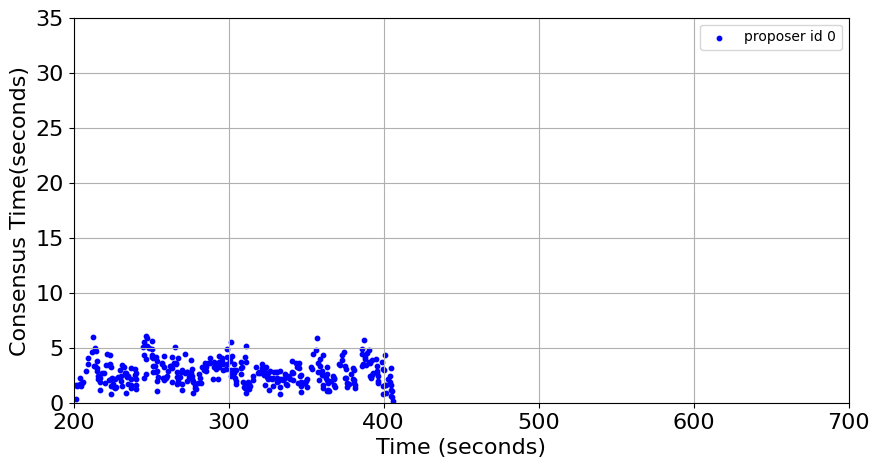

In [9]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [1]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v20/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    print(mean(consensus_time_list))
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='proposer id 0')
# plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='proposer id 1')
# plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='proposer id 2')
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Consensus Time(seconds)', fontsize=16)

plt.ylim(0, 35)
plt.xlim(200, 700)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend()
plt.show()






2.7378240223463686
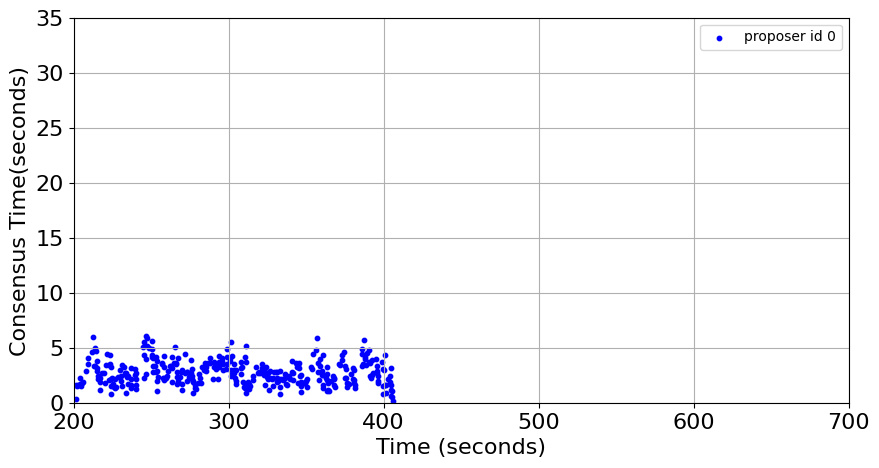

CDF(Cumulative Distribution Function)のプロット

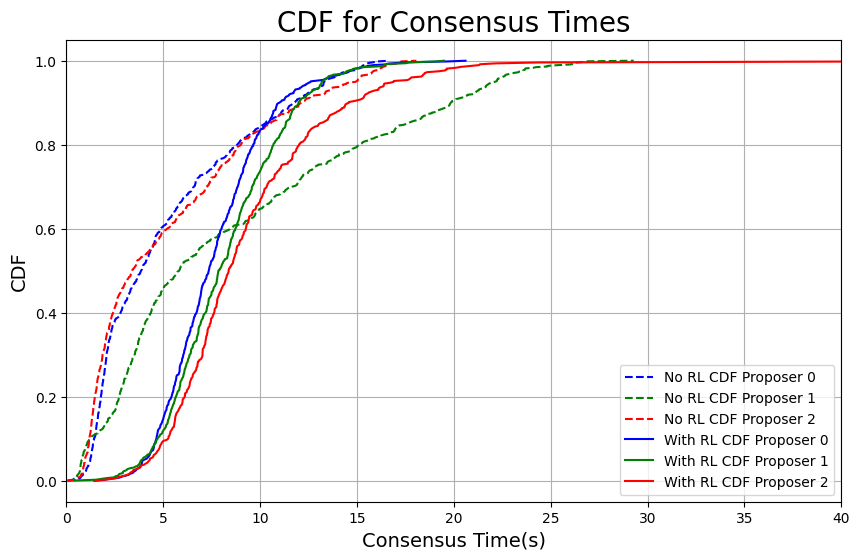

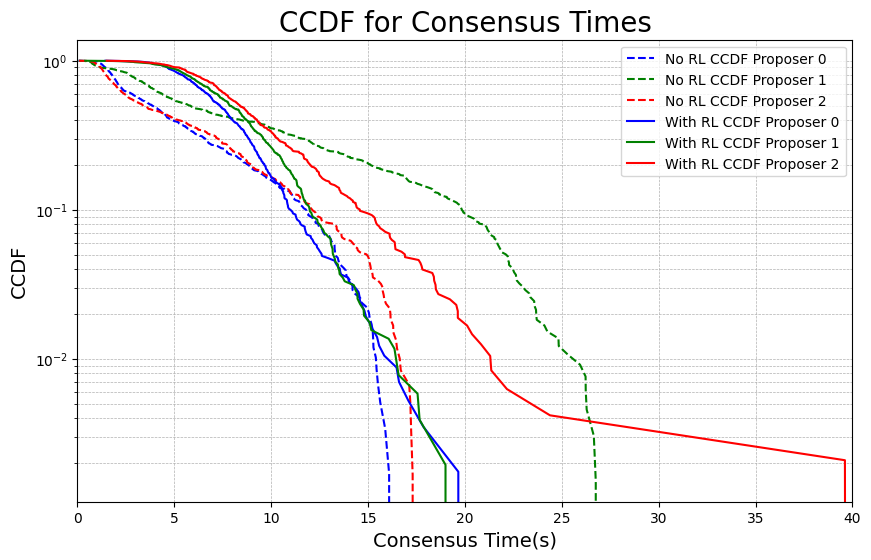

In [24]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_no_rl.append(start_time_list)
    consensus_time_2lists_no_rl.append(consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_with_rl.append(start_time_list)
    consensus_time_2lists_with_rl.append(consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"No RL CDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"With RL CDF Proposer {i}")

plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"No RL CCDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"With RL CCDF Proposer {i}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CCDF", fontsize=14)
plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.legend(fontsize=10)
plt.show()